In [39]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import os

In [40]:
df = pd.read_csv('ds_salaries_real.csv',index_col='id',na_values='???')
Test_data = pd.read_csv('Personen.csv',sep=';')
%matplotlib inline

# Schritt 4: Visualisierung 

## Bar chart

<div class="alert alert-block alert-warning">

wir verwenden den befehl

**df.loc[:,'spaltenname'].plot(kind='bar')**

schau dir das beispiel an:

</div>

<Axes: >

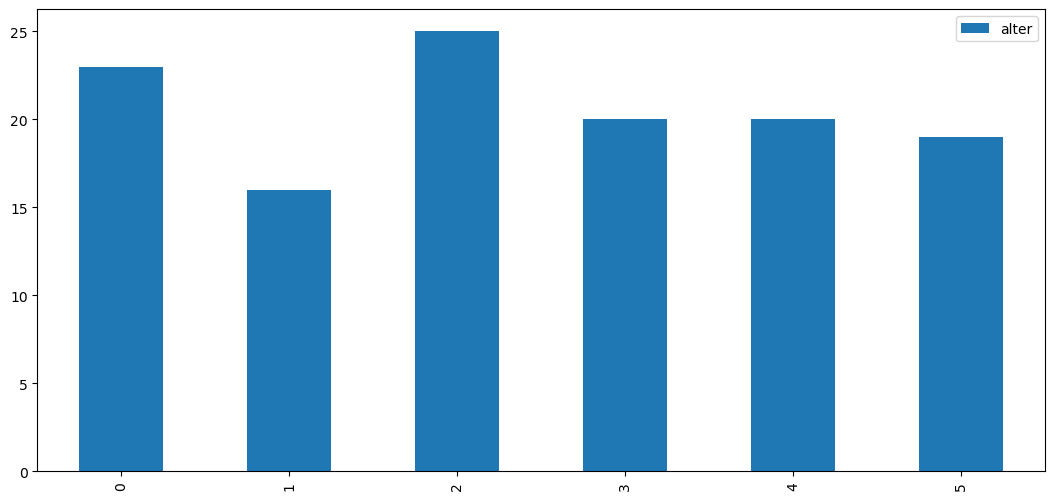

In [41]:
# Vorgegeben
Test_data.loc[:,['alter','vorname']].plot(kind='bar',figsize=(13, 6))

<div class="alert alert-block alert-info">

Wie du merkst  stet in der x-achse nur die id.

um name zu sehen muss du den übergabe parament x mitgeben. <br>

**x='spaltename'**

Aufgab zeigt das alte mit namen in der x achse 
</div>

<Axes: xlabel='vorname'>

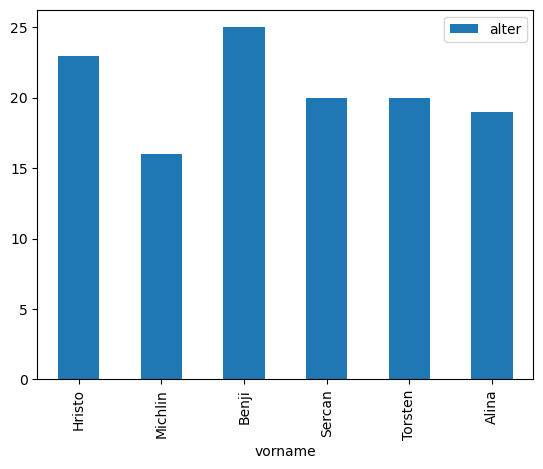

In [42]:
# selber
Test_data.loc[:,['alter','vorname']].plot(kind='bar',x='vorname')

## Aufgabe 1: Zeige an  wie viele Daten wir pro jahr haben.


<div class="alert alert-block alert-info">
nur aus dem bereich 'work_year'
</div>

In [43]:
# Hier Code einfügen

## Crosstab


<div class="alert alert-block alert-info">
Wir benötigen momentan für jeden Eintrag eine Spalte.
deswegen brauchen wir Crosstab
</div>

<Axes: xlabel='alter'>

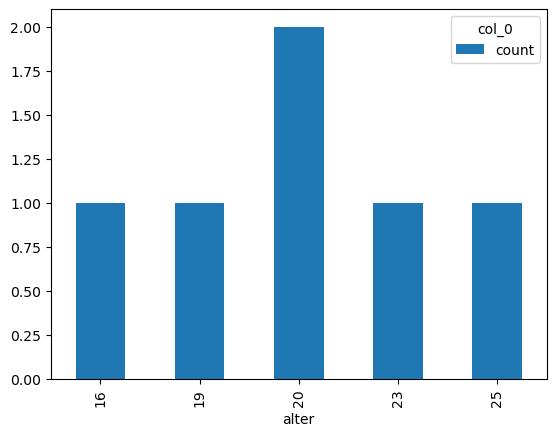

In [44]:
# vorgegeben
pd.crosstab(index=Test_data.loc[:,'alter'],columns='count').plot(kind='bar')

<div class="alert alert-block alert-info">

nun selber:
</div>

<Axes: xlabel='work_year'>

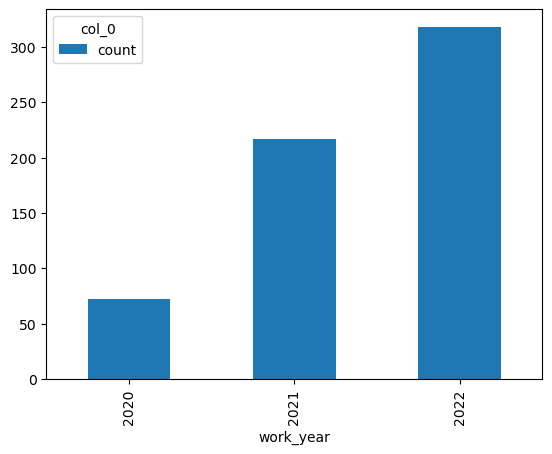

In [45]:
#selber
pd.crosstab(index=df.loc[:,'work_year'],columns='count').plot(kind='bar')


<div class="alert alert-block alert-info">
Optional: Wie viele leute arbeiten in großen, kleinen oder mittleren Unternehmen?
</div>

<Axes: xlabel='company_size'>

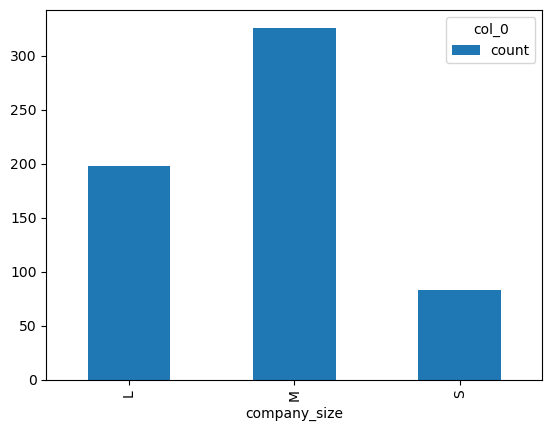

In [46]:
# selber
pd.crosstab(index=df.loc[:,'company_size'],columns='count').plot(kind='bar')

## Scatter Chart

<div class="alert alert-block alert-info">
schau dir das beispiel an:
</div>

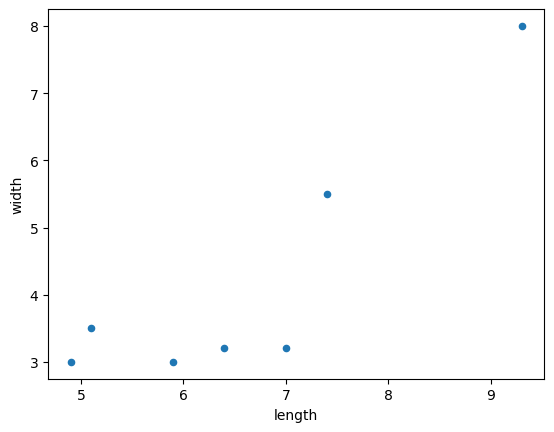

In [47]:
df_example = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2],[9.3,8.0,3.0],
                   [7.4,5.5,3.0]],
                  columns=['length', 'width', 'object_id'])
ax1 = df_example.plot.scatter(x='length',
                      y='width')

## Aufgabe 2: 
Erstelle in Scatter plot mit 'salary_in_use' auf der y-achse und 'experience_level' auf der x-achse.


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

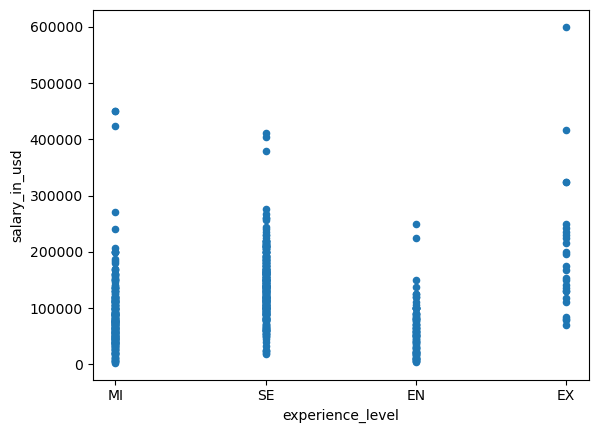

In [48]:
# selber

df.plot(x='experience_level',y='salary_in_usd',kind='scatter')

## Box Plots

<div class="alert alert-block alert-info">
Schau die das Beispiel an:
</div>

<Axes: title={'center': 'salary_in_usd'}, xlabel='experience_level'>

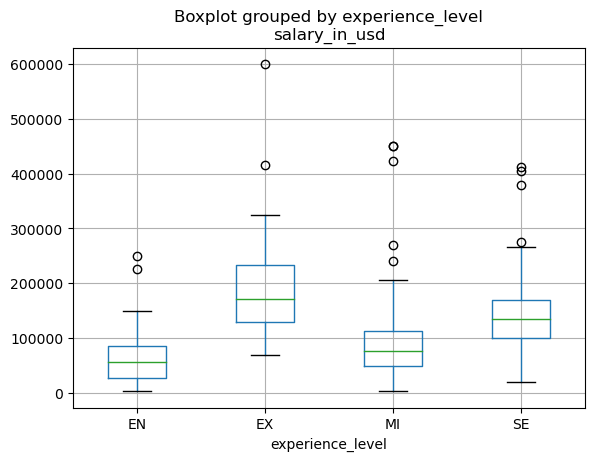

In [49]:
# Vorgegeben
df.boxplot(by='experience_level', column='salary_in_usd')

## Aufgabe 3:

erstelle ein Boxplot mit 'work_year' als x-achse und 'salery_in_usd' auf der y-achse.

<Axes: title={'center': 'salary_in_usd'}, xlabel='work_year'>

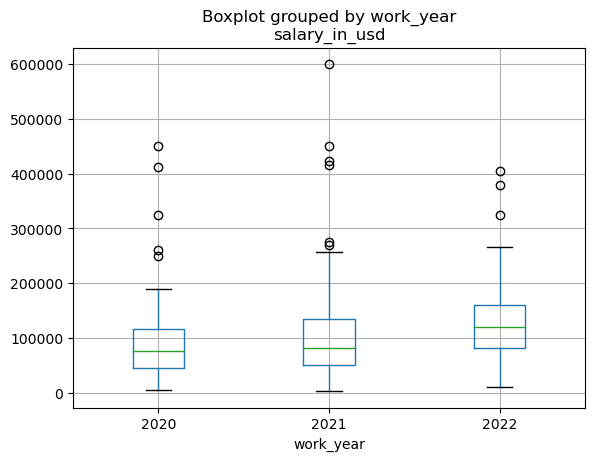

In [50]:
# selber
df.boxplot(by='work_year', column='salary_in_usd')

## Heat map

<div class="alert alert-block alert-info">
beispiel einer Correlations Matrix:
</div>


In [51]:
# vorgegen
df.loc[:,['work_year','salary_in_usd','remote_ratio']].corr()


,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


<div class="alert alert-block alert-warning">
die Matrix gibt Werte zwischen -1 und 1 an, welche die Korrelation angeben. 
</div>
 

## Aufgabe 4:

<div class="alert alert-block alert-info">
 baue ein Heatmap mit der obigen Matrix.

<br> nutze den Befehl: **sns.heatmap()**
</div> 
 

<Axes: >

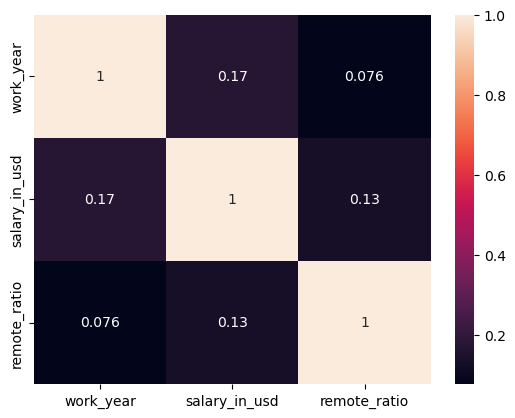

In [52]:
# selber
sns.heatmap(df.loc[:,['work_year','salary_in_usd','remote_ratio']].corr(),annot=True)

## Optionale Aufgaben

### Aufgabe 5:
 Visualisiere das Gehalt in Abhängigkeit zum Land.
Wähle den Diagramm Typen selbst     

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

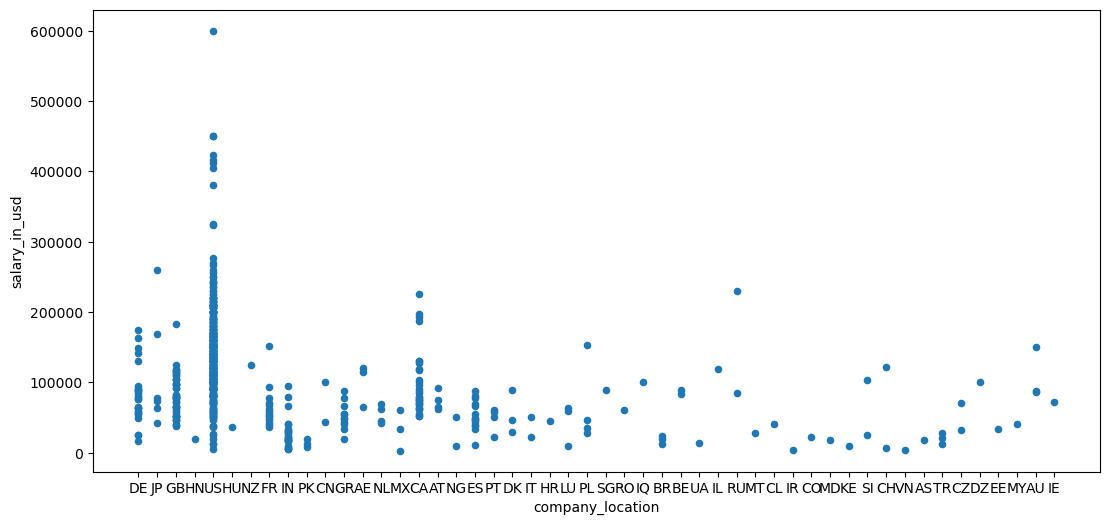

In [53]:
df.plot(x='company_location', y='salary_in_usd',kind='scatter',figsize=(13,6))

## Aufgabe 6

<div class="alert alert-block alert-info">
<b> Gehalt in Abhängigkeit zum Job </b>

Erstelle ein Balken Diagramm mit 'job_title' auf der x-achse und 'salary_in_usd' auf der Y-Achse. Die Länge der y-achse soll das Durchschnittsgehalt darstellen. 

Tip: nutze entweder 
1. group_by selbstrecherche (besser verständlich)
2. corsstab mit den den den Parametern: ,aggfunc='mean', values=df.salary_in_usd 
</div>

<Axes: xlabel='job_title'>

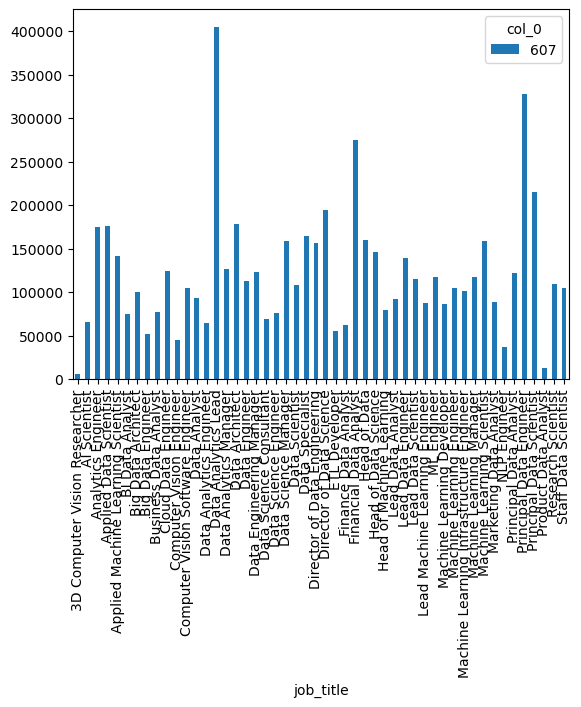

In [54]:
# selber
pd.crosstab(index=df.loc[:,'job_title'],columns=df.loc[:,'salary_in_usd'].count(),aggfunc='mean', values=df.salary_in_usd).plot(kind='bar')

<Axes: xlabel='job_title'>

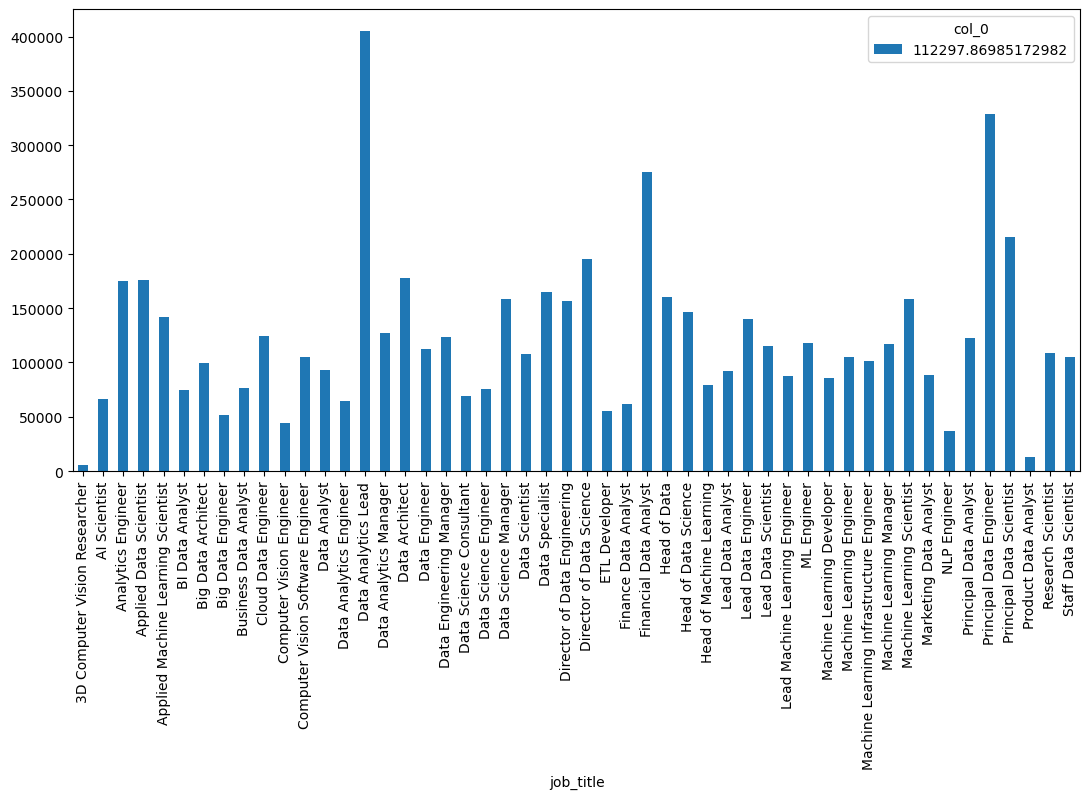

In [55]:
# selber
pd.crosstab(index=df.loc[:,'job_title'],columns=df.loc[:,'salary_in_usd'].mean(),aggfunc='mean', values=df.salary_in_usd).plot(kind='bar',figsize=(13, 6))

<Axes: xlabel='job_title'>

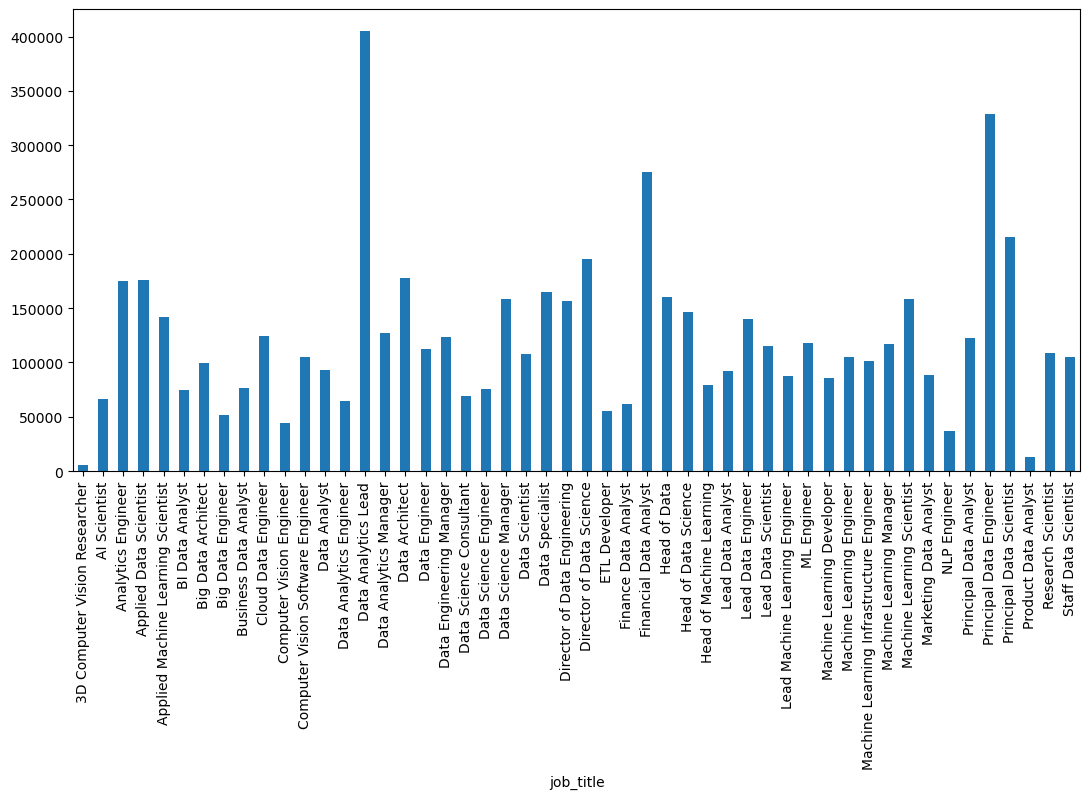

In [56]:
# selber
df.groupby(by='job_title')['salary_in_usd'].mean().plot(kind='bar',figsize=(13, 6))

## Aufgabe 7

<div class="alert alert-block alert-info">
Visualisiere die absolute Anzahl an Datenpunkten pro Job
</div>




<Axes: xlabel='job_title'>

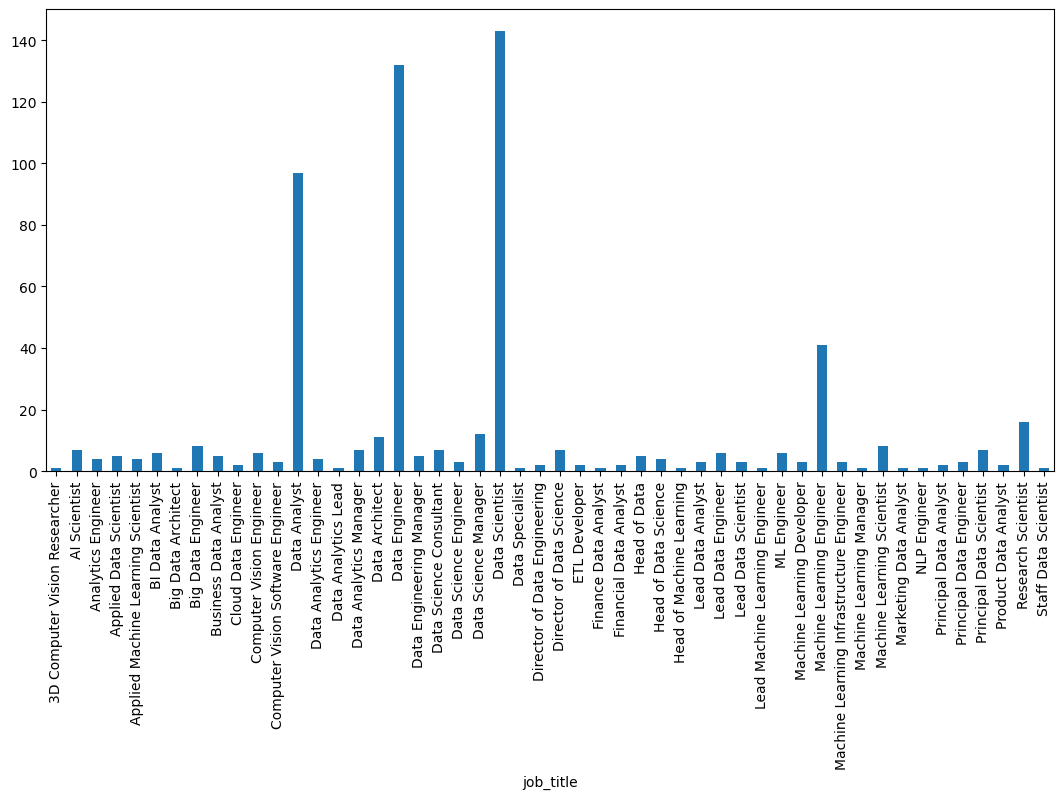

In [57]:
df.groupby(by='job_title')['job_title'].count().plot(kind='bar',figsize=(13, 6))